In [2]:
from functions import *

## Data downloading

In [3]:
HP1_data = pd.read_csv('../Data/raw_data/Harry Potter 1.csv', sep=';', encoding='unicode_escape')
HP2_data = pd.read_csv('../Data/raw_data/Harry Potter 2.csv', sep=';', encoding='unicode_escape')
HP3_data = pd.read_csv('../Data/raw_data/Harry Potter 3.csv', sep=';', encoding='unicode_escape')

## Preprocessing

### 1st film

In [4]:
df1 = HP1_data.copy()
df1.Character = df1.Character.apply(lambda t : string.capwords(t)) 
df1.Character = df1.Character.apply(lambda t : t.strip())
df1['Sentence_tokenized'] = df1.apply(sentence_tokenization, axis=1)
df1['Sentence_lemmatized'] = df1.apply(sentence_lemmatization, axis=1)
df1['Sentence_cleared'] = df1.apply(remove_stop_words, axis=1)

### 2nd film

In [5]:
df2 = HP2_data.copy()
df2.Character = df2.Character.apply(lambda t : string.capwords(t))
df2.Character = df2.Character.apply(lambda t : t.strip())
df2['Sentence_tokenized'] = df2.apply(sentence_tokenization, axis=1)
df2['Sentence_lemmatized'] = df2.apply(sentence_lemmatization, axis=1)
df2['Sentence_cleared'] = df2.apply(remove_stop_words, axis=1)

### 3rd film

In [6]:
df3 = HP3_data.copy()
df3.Character = df3.Character.apply(lambda t : string.capwords(t))
df3.Character = df3.Character.apply(lambda t : t.strip())
df3['Sentence_tokenized'] = df3.apply(sentence_tokenization, axis=1)
df3['Sentence_lemmatized'] = df3.apply(sentence_lemmatization, axis=1)
df3['Sentence_cleared'] = df3.apply(remove_stop_words, axis=1)

In [ ]:
# df1.to_csv('../Data/temporary_data/HP1_preprocessed.csv', index=False, sep=';')
# df2.to_csv('../Data/temporary_data/HP2_preprocessed.csv', index=False, sep=';')
# df3.to_csv('../Data/temporary_data/HP3_preprocessed.csv', index=False, sep=';')

## Spleech splitting

Here, we gather all the words from the two first films (df1 and df2 sentence_cleared columns) by character.

In [6]:
df2_data = df2[["Character","Sentence_cleared"]].copy()
df1_data = df1[["Character","Sentence_cleared"]].copy()
film_data = pd.concat([df2_data,df1_data], ignore_index=True) 
film_data.Character = film_data.Character.apply(lambda t : t.lower())
film_data.Character = film_data.Character.apply(lambda t : t.strip())

In [9]:
persos = set(film_data.Character.values)

list_speech = []

for perso in persos:
    t = list(film_data[film_data.Character == perso].Sentence_cleared.values) #array of perso's speech
    list_speech.append([item for sublist in t for item in sublist])

data_word_speech = pd.DataFrame(list(zip(persos,list_speech)), columns=["Character","Speech"])

In [ ]:
# data_word_speech.to_csv("../Data/temporary_data/Words_by_character.csv")

Modifications done on the raw previous exported dataframe:

  * when we have many characters in one line, we duplicate it for each one of them
  
  * correcting *"hermoine"* to *"hermione"* and *"oiiver"* to *"oliver"*

Then we do the same work on the third film:

In [11]:
df3_data = df3[["Character","Sentence_cleared"]].copy()
df3_data.Character = df3_data.Character.apply(lambda t : t.lower())
df3_data.Character = df3_data.Character.apply(lambda t : t.strip())

In [17]:
persos_3 = list(set(df3_data.Character.values))

list_speech_3 = []

for perso in persos_3:
    df_perso = pd.DataFrame(df3_data[df3_data.Character == perso].Sentence_cleared).reset_index(drop=True)
    t = df_perso.Sentence_cleared.sum()
    list_speech_3.append([item for item in t ])

data_word_speech_3 = pd.DataFrame(list(zip(persos_3,list_speech_3)), columns=["Character","Speech"])

In [ ]:
# data_word_speech_3.to_csv("../Data/temporary_data/Words_by_character_3.csv", sep=';', index=False)

## Word cloud

In [7]:
text_1 = df1['Sentence_cleared'].sum()
text_1 = ' '.join(text_1)
text_2 = df2['Sentence_cleared'].sum()
text_2 = ' '.join(text_2)
text_3 = df3['Sentence_cleared'].sum()
text_3 = ' '.join(text_3)

In [8]:
custom_mask1 = np.array(Image.open("../Wordcloud/mask1.jpg"))
custom_mask3 = np.array(Image.open("../Wordcloud/mask3.jpg"))
custom_mask4 = np.array(Image.open("../Wordcloud/mask4.jpg"))
custom_mask5 = np.array(Image.open("../Wordcloud/mask5.jpg"))

In [9]:
wc = WordCloud(width=800, height=400, background_color="white",
               mask=custom_mask4, color_func=grey_color_func, max_words=500)

text_wc = text_1 + text_2 + text_3

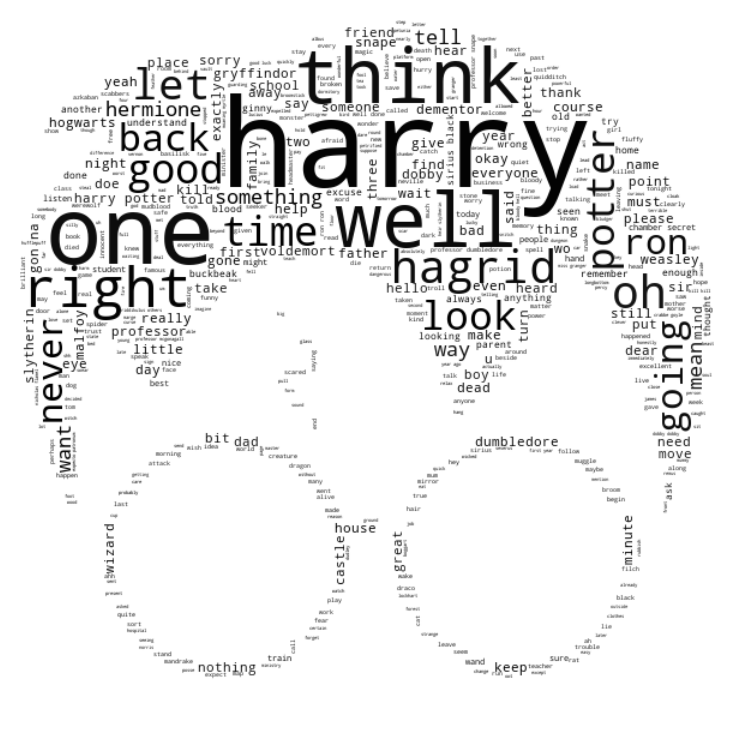

In [10]:
wc.generate(text_wc)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()